<a href="https://colab.research.google.com/github/remixwithkj/Backupmac/blob/main/Similarity_Using_Distance_v1_with_edits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Clustering

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
custs_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/distance/Distance_Datasets.xlsx",
                         'Customers')

In [ ]:
custs_df

,Name,Age,Income
0,A,20,10000
1,B,21,11000
2,C,70,10500
3,D,50,90000


In [ ]:
import warnings
warnings.filterwarnings('ignore')

## Euclidean Distance

The  distance between two customers, $customer_{1}$ and $customer_{2}$ is calculated as follows:

$\sqrt{(age_{1} - age_{2})^2 +  (income_{1} - income_{2})^2}$

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
x = euclidean_distances(custs_df[['Age', 'Income']])

In [ ]:
x

array([[    0.        ,  1000.0005    ,   502.49378106, 80000.005625  ],
       [ 1000.0005    ,     0.        ,   502.39526272, 79000.00532278],
       [  502.49378106,   502.39526272,     0.        , 79500.00251572],
       [80000.005625  , 79000.00532278, 79500.00251572,     0.        ]])

## Convert array to pandas dataframe and presenting it in a more readable format

In [ ]:
df_ecd = pd.DataFrame(data = x, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

print("\nPandas DataFrame for euclidean distance: ")
df_ecd


Pandas DataFrame for euclidean distance: 


,A,B,C,D
A,0.000000,1000.000500,502.493781,80000.005625
B,1000.000500,0.000000,502.395263,79000.005323
C,502.493781,502.395263,0.000000,79500.002516
D,80000.005625,79000.005323,79500.002516,0.000000


In [ ]:
#row by label

# Selecting a row by label using .loc[]
row_by_label = df_ecd.loc[1]  # Selects the row with index label 1
# it must throw and error because we have no such index and indeed it did!

In [ ]:
#row by label

# Selecting a row by label using .loc[]
row_by_label1 = df_ecd.loc["A"]  # Selects the row with index label A
row_by_label1

A        0.000000
B     1000.000500
C      502.493781
D    80000.005625
Name: A, dtype: float64

In [ ]:
# Selecting a row by integer position using .iloc[]
row_by_position = df_ecd.iloc[0:1]  # Selects the first row (Bob)
row_by_position

,A,B,C,D
A,0.0,1000.0005,502.493781,80000.005625


In [ ]:
# Selecting a row based on a condition
row_condition = df_ecd[df_ecd['A'] == 0]  # Selects rows where A==0
row_condition

,A,B,C,D
A,0.0,1000.0005,502.493781,80000.005625


In [ ]:
# Selecting a row based on a condition
row_condition = df_ecd[df_ecd['A'] != 0]  # Selects rows where A!=0
row_condition

,A,B,C,D
B,1000.000500,0.000000,502.395263,79000.005323
C,502.493781,502.395263,0.000000,79500.002516
D,80000.005625,79000.005323,79500.002516,0.000000


## General format of and iloc  is
df.iloc[0:2, 0:2]` selects the first two rows (index 0 and 1) and the first two columns (index 0 and 1)

iloc[row_range, column_range]

## Select all columns and first row from the euclidean dataframe using iloc

In [ ]:
# Selecting first row and column using .iloc[]
frfc = df_ecd.iloc[0:1,0:4]  # Selects the first row (Bob)
frfc

,A,B,C,D
A,0.0,1000.0005,502.493781,80000.005625


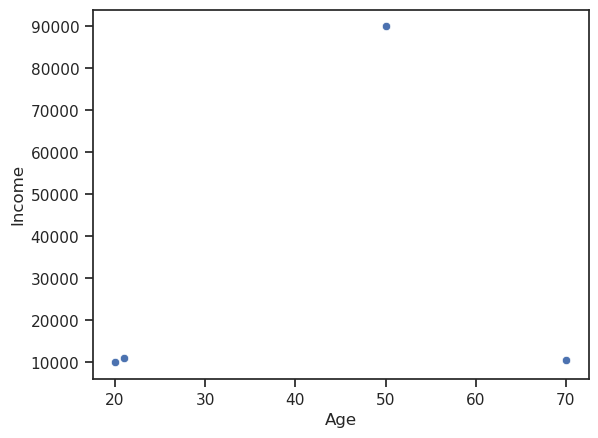

In [ ]:
sn.set_theme(style="ticks")
sn.scatterplot(data = custs_df,
               x = 'Age',
               y = 'Income');

#### Inference:

- Distance wise A and B are very different, whereas A and c are similar.
In reality, A and B are are very similar whereas A and C are very different as they have huge difference in terms of age.

- This is because of difference in scale in which age and income are represented.

##  Min Max Scaling


In this technique, the minimum value of the feature is scaled to 0 and the maximum value is scaled to 1. All other values are scaled to a value between 0 and 1 based on their relative position to the minimum and maximum values.

$X_{norm} = \frac{X_{i} - X_{min}}{X_{max} - X_{min}}$

[Sklearn Source](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
custs_df

,Name,Age,Income
0,A,20,10000
1,B,21,11000
2,C,70,10500
3,D,50,90000


1. `scaler = MinMaxScaler()` - This line initializes an instance of the `MinMaxScaler` class from the `sklearn.preprocessing` module. The `MinMaxScaler` is used to scale features to a specified range, typically between 0 and 1.

2. `scaled_custs_df = scaler.fit_transform(custs_df[["Age", "Income"]])` - This line applies the `fit_transform()` method of the `MinMaxScaler` to the specified columns ("Age" and "Income") of the `custs_df` DataFrame. `fit_transform()` first computes the minimum and maximum values for each feature (column) and then scales the data accordingly. The result is a NumPy array where the values of "Age" and "Income" are scaled to the range [0, 1].

4. `scaled_custs_df` - This line outputs the entire scaled array, which contains the transformed values of "Age" and "Income" after scaling.

In [ ]:
scaler = MinMaxScaler()
scaled_custs_df = scaler.fit_transform(custs_df[["Age", "Income"]] )
scaled_custs_df
# scaled_custs_df[0:10]

array([[0.     , 0.     ],
       [0.02   , 0.0125 ],
       [1.     , 0.00625],
       [0.6    , 1.     ]])

In [ ]:
dist = euclidean_distances(scaled_custs_df)
dist

array([[0.        , 0.02358495, 1.00001953, 1.16619038],
       [0.02358495, 0.        , 0.98001993, 1.14523196],
       [1.00001953, 0.98001993, 0.        , 1.0712325 ],
       [1.16619038, 1.14523196, 1.0712325 , 0.        ]])

In [ ]:
df_ecd1 = pd.DataFrame(data = dist, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

print("\nPandas DataFrame for euclidean distance post min_max scaling: ")
df_ecd1


Pandas DataFrame for euclidean distance post min_max scaling: 


,A,B,C,D
A,0.000000,0.023585,1.000020,1.166190
B,0.023585,0.000000,0.980020,1.145232
C,1.000020,0.980020,0.000000,1.071232
D,1.166190,1.145232,1.071232,0.000000


In [ ]:
#isolating all columns and first row using iloc
# Selecting first row and column using .iloc[]
frfc1 = df_ecd1.iloc[0:1,0:4]
frfc1

,A,B,C,D
A,0.0,0.023585,1.00002,1.16619


## Cosine Distances

Running cosine similarity function without scaling

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cs= cosine_similarity(custs_df[['Age', 'Income']])
cs

array([[1.        , 1.        , 0.99998911, 0.99999896],
       [1.        , 1.        , 0.99998868, 0.99999908],
       [0.99998911, 0.99998868, 1.        , 0.99998133],
       [0.99999896, 0.99999908, 0.99998133, 1.        ]])

In [ ]:
df_ecd2 = pd.DataFrame(data = cs, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

print("\nPandas DataFrame for cs: ")
df_ecd2


Pandas DataFrame for cs: 


,A,B,C,D
A,1.000000,1.000000,0.999989,0.999999
B,1.000000,1.000000,0.999989,0.999999
C,0.999989,0.999989,1.000000,0.999981
D,0.999999,0.999999,0.999981,1.000000


In [ ]:
#isolating all columns and first row using iloc
# Selecting first row and column using .iloc[]
frfc2 = df_ecd2.iloc[0:1,0:4]
frfc2

,A,B,C,D
A,1.0,1.0,0.999989,0.999999


Running cosine similarity function with min-max scaling first

In [ ]:
scaled_custs_df

array([[0.     , 0.     ],
       [0.02   , 0.0125 ],
       [1.     , 0.00625],
       [0.6    , 1.     ]])

In [ ]:
#cosine similarity

cosine_sim = cosine_similarity(scaled_custs_df)
cosine_sim

array([[0.        , 0.        , 0.        , 0.        ],
       [0.        , 1.        , 0.85129417, 0.89076187],
       [0.        , 0.85129417, 1.        , 0.51984493],
       [0.        , 0.89076187, 0.51984493, 1.        ]])

In [ ]:
# convert the array into dataframe

df_ecd3 = pd.DataFrame(data = cosine_sim, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

print("\nPandas DataFrame for cs post min-max scaler: ")
df_ecd3


Pandas DataFrame for cs post min-max scaler: 


,A,B,C,D
A,0.0,0.000000,0.000000,0.000000
B,0.0,1.000000,0.851294,0.890762
C,0.0,0.851294,1.000000,0.519845
D,0.0,0.890762,0.519845,1.000000


In [ ]:
#isolating all columns and first row using iloc

frfc3 = df_ecd3.iloc[0:1,0:4]
frfc3

,A,B,C,D
A,0.0,0.0,0.0,0.0


#### Obviously cosine similarity is not appropriate for this case. for both the states that is without scaling and with scaling it throws inappropriate results. This should only be used for sparse data and possibly only with binary inputs that is 0 and 1

## Canberra Distances

1. `from sklearn.metrics import DistanceMetric` - This line imports the `DistanceMetric` class from the `sklearn.metrics` module, which provides various distance metrics for measuring the distance between data points.

2. `dist = DistanceMetric.get_metric('canberra')` - This line retrieves the Canberra distance metric by calling the `get_metric()` method of the `DistanceMetric` class. The Canberra distance is a weighted version of the Manhattan distance that is sensitive to small differences in values.

3. `dist.pairwise(custs_df[['Age', 'Income']])` - This line calculates the pairwise Canberra distances between all pairs of observations in the specified columns ('Age' and 'Income') of the `custs_df` DataFrame. The result is a distance matrix where each entry represents the distance between a pair of observations based on the selected features.

In [ ]:
from sklearn.metrics import DistanceMetric
dist = DistanceMetric.get_metric('canberra')

dist.pairwise(custs_df[['Age', 'Income']])

array([[0.        , 0.07200929, 0.5799458 , 1.22857143],
       [0.07200929, 0.        , 0.56171735, 1.19062892],
       [0.5799458 , 0.56171735, 0.        , 0.95771144],
       [1.22857143, 1.19062892, 0.95771144, 0.        ]])

The `get_metric` function from the `DistanceMetric` class in `sklearn.metrics` can take the following arguments:

1. **metric** (str): This is a required argument that specifies the name of the distance metric to be used. It can be a string representing one of the available distance metrics, such as 'euclidean', 'manhattan', 'canberra', 'chebyshev', etc.

In [ ]:
# compare all the distances on the custs_df

In [ ]:
# start with Euclidean distance

dist_e = DistanceMetric.get_metric('euclidean')

x1 = dist_e.pairwise(custs_df[['Age', 'Income']])

#labelling the array before printing

dfe = pd.DataFrame(data = x1, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

#isolating all columns and first row using iloc

ecd = dfe.iloc[0:1,0:4]
ecd

,A,B,C,D
A,0.0,1000.0005,502.493781,80000.005625


In [ ]:
# now manhattan

dist_m = DistanceMetric.get_metric('manhattan')

x2 = dist_m.pairwise(custs_df[['Age', 'Income']])

#labelling the array before printing

dfm = pd.DataFrame(data = x2, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

#isolating all columns and first row using iloc

mht = dfm.iloc[0:1,0:4]
mht

,A,B,C,D
A,0.0,1001.0,550.0,80030.0


In [ ]:
# now canberra

dist_c = DistanceMetric.get_metric('canberra')

x3 = dist_c.pairwise(custs_df[['Age', 'Income']])

#labelling the array before printing

dfc = pd.DataFrame(data = x3, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

#isolating all columns and first row using iloc

cnb = dfc.iloc[0:1,0:4]
cnb

,A,B,C,D
A,0.0,0.072009,0.579946,1.228571


In [ ]:
# now chebyshev

dist_ch = DistanceMetric.get_metric('chebyshev')

x4 = dist_ch.pairwise(custs_df[['Age', 'Income']])

#labelling the array before printing

dfch = pd.DataFrame(data = x4, index =["A", "B", "C", "D"],
                  columns =["A", "B", "C", "D"])

#isolating all columns and first row using iloc

chb = dfch.iloc[0:1,0:4]
chb

,A,B,C,D
A,0.0,1000.0,500.0,80000.0


#### Conclusion - Chebyshev, Manhattan, and Euclidean offer similar distance insights. The outlier is canberra which has completely different outcome

## Jaccard Distance for categorical features

In [ ]:
movies_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/distance/Distance_Datasets.xlsx",
                          "Movies",
                          index_col='Users')

In [ ]:
movies_df

,Movie_1,Movie_2,Movie_3,Movie_4,Movie_5,Movie_6,Movie_7,Movie_8,Movie_9,Movie_10
Users,,,,,,,,,,
User_1,0,1,1,0,1,1,1,1,1,1
User_2,1,0,0,1,0,0,0,0,0,1
User_3,0,1,1,0,0,1,1,1,1,0
User_4,1,0,1,0,1,1,0,1,1,0
User_5,0,1,0,1,1,1,1,1,0,1


In [ ]:
from scipy.spatial.distance import jaccard

1. `movies_df.loc['User_1']` - This part accesses the row in the DataFrame `movies_df` that corresponds to 'User_1'. The `.loc` method is used to select rows by their index label.

2. `.values` - This converts the selected row (which is a Series) into a NumPy array containing the values (e.g., movie ratings or preferences) for 'User_1'.

3. `movies_df.loc['User_2'].values` - Similarly, this accesses the row for 'User_2' and converts it into a NumPy array of values.

4. `jaccard(...)` - This function (presumably defined elsewhere in the code) takes the two arrays as input and computes the Jaccard similarity, which is a measure of similarity between two sets. It is calculated as the size of the intersection divided by the size of the union of the two sets.

Overall, this line of code is used to compare the movie preferences of two users and quantify their similarity using the Jaccard index.

In [ ]:
jaccard(movies_df.loc['User_1'].values, movies_df.loc['User_2'].values)

0.9

distances = pairwise_distances(X)` - This line calls the `pairwise_distances` function with the array `X` as input. It computes the pairwise distances between all points in `X` and stores the result in the variable `distances`. The output is a square matrix where the element at position (i, j) represents the distance between the i-th and j-th points.

The `pairwise_distances` function calculates distances between pairs of samples using various distance metrics. By default, it uses the Euclidean distance, but it can also compute other types of distances based on the specified metric.

**Custom Metrics**: Users can specify a different metric by passing the `metric` parameter to the function, allowing for flexibility in distance calculations based on the specific needs of the analysis.

Overall, `pairwise_distances` provides a convenient way to compute distances between multiple samples efficiently.

Custom metrics can take up the following parameters

   - **Euclidean Distance**: The straight-line distance between two points in Euclidean space.
   - **Manhattan Distance**: The sum of the absolute differences of their Cartesian coordinates.
   - **Cosine Distance**: Measures the cosine of the angle between two vectors.
   - **Minkowski Distance**: A generalization of both Euclidean and Manhattan distances.
   - **Jaccard Distance**: 1 - jaccard index

In [ ]:
# Example pairwise distance
from sklearn.metrics.pairwise import pairwise_distances
import numpy as np

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6]])

# Compute pairwise distances
distances1 = pairwise_distances(X)
distances2 = pairwise_distances(X, metric = 'euclidean')
print(distances1)
print("\n \n")
print("Logical Space \n \n")
print(distances2)
print("\n")
print("indeed default and euclidean distances are the same hence \n by default pairwise distance adopts euclidean distance")

[[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]

 

Logical Space 
 

[[0.         2.82842712 5.65685425]
 [2.82842712 0.         2.82842712]
 [5.65685425 2.82842712 0.        ]]


indeed default and euclidean distances are the same hence 
 by default pairwise distance adopts euclidean distance


In [ ]:
movies_df

,Movie_1,Movie_2,Movie_3,Movie_4,Movie_5,Movie_6,Movie_7,Movie_8,Movie_9,Movie_10
Users,,,,,,,,,,
User_1,0,1,1,0,1,1,1,1,1,1
User_2,1,0,0,1,0,0,0,0,0,1
User_3,0,1,1,0,0,1,1,1,1,0
User_4,1,0,1,0,1,1,0,1,1,0
User_5,0,1,0,1,1,1,1,1,0,1


In [ ]:
movies_df.values

array([[0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [1, 0, 1, 0, 1, 1, 0, 1, 1, 0],
       [0, 1, 0, 1, 1, 1, 1, 1, 0, 1]])

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
# using 1- jaccard similarity to degree of similarity because
# jaccard similarity is measure of dissimilarity

In [ ]:
jaccard_similarity = 1 - pairwise_distances(movies_df.values, metric="jaccard")

In [ ]:
jaccard_similarity

array([[1.        , 0.1       , 0.75      , 0.55555556, 0.66666667],
       [0.1       , 1.        , 0.        , 0.125     , 0.25      ],
       [0.75      , 0.        , 1.        , 0.5       , 0.44444444],
       [0.55555556, 0.125     , 0.5       , 1.        , 0.3       ],
       [0.66666667, 0.25      , 0.44444444, 0.3       , 1.        ]])

2. `jaccard_similarity` - This variable is expected to contain a 2D array or matrix that represents the Jaccard similarity values between items (e.g., movies). Each entry in this matrix indicates the similarity between two items.

3. `index = movies_df.index` - This argument sets the index of the new DataFrame to be the same as the index of the `movies_df` DataFrame. This ensures that the rows of the new DataFrame are labeled with the same identifiers as those in the original `movies_df`.

4. `columns = movies_df.index` - This argument sets the column labels of the new DataFrame to also be the same as the index of `movies_df`. This means that the columns will be labeled with the same identifiers, allowing for easy interpretation of the similarity values.

Overall, this line of code constructs a DataFrame that represents the Jaccard similarity between items, with both rows and columns labeled according to the original items in `movies_df`.

In [ ]:
rec_df = pd.DataFrame(jaccard_similarity, index = movies_df.index, columns = movies_df.index )
rec_df

Users,User_1,User_2,User_3,User_4,User_5
Users,,,,,
User_1,1.000000,0.100,0.750000,0.555556,0.666667
User_2,0.100000,1.000,0.000000,0.125000,0.250000
User_3,0.750000,0.000,1.000000,0.500000,0.444444
User_4,0.555556,0.125,0.500000,1.000000,0.300000
User_5,0.666667,0.250,0.444444,0.300000,1.000000


## Haversine

In [ ]:
cities_df = pd.read_excel("https://raw.githubusercontent.com/manaranjanp/ISB_MLUL/main/distance/Distance_Datasets.xlsx"
                          , "Cities"
                          , index_col='City')

In [ ]:
cities_df

,Latitude,Longitude,numpy_lat_radians,numpy_long_radians
City,,,,
Mumbai,19.0760,72.8777,0.332939,1.271956
Delhi,28.7041,77.1025,0.500981,1.345692
Bangalore,12.9716,77.5946,0.226397,1.354281
Kolkata,22.5726,88.3639,0.393966,1.542241
Chennai,13.0827,80.2707,0.228336,1.400988
Hyderabad,17.3850,78.4867,0.303425,1.369851
Pune,18.5204,73.8567,0.323242,1.289043
Ahmedabad,23.0225,72.5714,0.401818,1.266610
Jaipur,26.9124,75.7873,0.469710,1.322738


In [ ]:
from math import radians

In [ ]:
cities_df['lat_radians'] = cities_df['Latitude'].map(radians)
cities_df['long_radians'] = cities_df['Longitude'].map(radians)

In [ ]:
#converting lat and long to radians using numpy radian function

cities_df['numpy_lat_radians'] = np.radians(cities_df['Latitude'])

In [ ]:
cities_df['numpy_long_radians'] = np.radians(cities_df['Longitude'])

In [ ]:
cities_df

,Latitude,Longitude,numpy_lat_radians,numpy_long_radians,lat_radians,long_radians
City,,,,,,
Mumbai,19.0760,72.8777,0.332939,1.271956,0.332939,1.271956
Delhi,28.7041,77.1025,0.500981,1.345692,0.500981,1.345692
Bangalore,12.9716,77.5946,0.226397,1.354281,0.226397,1.354281
Kolkata,22.5726,88.3639,0.393966,1.542241,0.393966,1.542241
Chennai,13.0827,80.2707,0.228336,1.400988,0.228336,1.400988
Hyderabad,17.3850,78.4867,0.303425,1.369851,0.303425,1.369851
Pune,18.5204,73.8567,0.323242,1.289043,0.323242,1.289043
Ahmedabad,23.0225,72.5714,0.401818,1.266610,0.401818,1.266610
Jaipur,26.9124,75.7873,0.469710,1.322738,0.469710,1.322738


1. `from sklearn.metrics.pairwise` - This part specifies the module from which we want to import a function. In this case, it is the `pairwise` module located within the `metrics` subpackage of `scikit-learn` (often abbreviated as `sklearn`).

2. `import haversine_distances` - This part indicates that we are importing the `haversine_distances` function, which is used to compute the pairwise distances between points on the Earth's surface given their latitude and longitude coordinates.

Overall, this line of code allows you to use the `haversine_distances` function in your code, which is useful for calculating distances based on the Haversine formula, commonly used in geographic applications.

In [ ]:
from sklearn.metrics.pairwise import haversine_distances

In [ ]:
aerial_distance = haversine_distances(cities_df[['lat_radians', 'long_radians']])

In [ ]:
aerial_distance

array([[0.        , 0.18101417, 0.13268221, 0.25974558, 0.16215641,
        0.09754557, 0.01885925, 0.06905977, 0.14452085, 0.18751762],
       [0.18101417, 0.        , 0.27470017, 0.20683623, 0.27745274,
        0.1987962 , 0.18513301, 0.12202296, 0.03728339, 0.06762515],
       [0.13268221, 0.27470017, 0.        , 0.24496886, 0.04554576,
        0.07847955, 0.11540213, 0.19416806, 0.24510062, 0.24829166],
       [0.25974558, 0.20683623, 0.24496886, 0.        , 0.21320997,
        0.18550967, 0.24727296, 0.25409757, 0.21311791, 0.13922217],
       [0.16215641, 0.27745274, 0.04554576, 0.21320997, 0.        ,
        0.08087296, 0.14351981, 0.21532082, 0.25225227, 0.24048084],
       [0.09754557, 0.1987962 , 0.07847955, 0.18550967, 0.08087296,
        0.        , 0.07938379, 0.13804712, 0.17189556, 0.16984281],
       [0.01885925, 0.18513301, 0.11540213, 0.24727296, 0.14351981,
        0.07938379, 0.        , 0.08132571, 0.14972072, 0.18470044],
       [0.06905977, 0.12202296, 0.1941680

The multiplication by `6371000` (the approximate radius of the Earth in meters) is intended to convert the angular distance (in radians) calculated by the Haversine formula into a linear distance in meters.

The division by `1000` converts the distance from meters to kilometers.

In [ ]:
aerial_distance_kms = aerial_distance * 6371000/1000
aerial_distance_kms

array([[   0.        , 1153.24129125,  845.31838566, 1654.8391168 ,
        1033.09851229,  621.46285008,  120.15230197,  439.97982267,
         920.74235994, 1194.6747399 ],
       [1153.24129125,    0.        , 1750.11476241, 1317.75360304,
        1767.65141115, 1266.53060328, 1179.48242792,  777.40828075,
         237.53250239,  430.83985395],
       [ 845.31838566, 1750.11476241,    0.        , 1560.69662326,
         290.17202495,  499.9932409 ,  735.22694258, 1237.04469746,
        1561.53604825, 1581.86618933],
       [1654.8391168 , 1317.75360304, 1560.69662326,    0.        ,
        1358.36071543, 1181.88210021, 1575.37605359, 1618.85559067,
        1357.77419014,  886.98443856],
       [1033.09851229, 1767.65141115,  290.17202495, 1358.36071543,
           0.        ,  515.24163438,  914.3646912 , 1371.80891612,
        1607.09919695, 1532.10343439],
       [ 621.46285008, 1266.53060328,  499.9932409 , 1181.88210021,
         515.24163438,    0.        ,  505.75412148,  879

In [ ]:
pd.DataFrame( aerial_distance_kms, index = cities_df.index, columns = cities_df.index )

City,Mumbai,Delhi,Bangalore,Kolkata,Chennai,Hyderabad,Pune,Ahmedabad,Jaipur,Lucknow
City,,,,,,,,,,
Mumbai,0.000000,1153.241291,845.318386,1654.839117,1033.098512,621.462850,120.152302,439.979823,920.742360,1194.674740
Delhi,1153.241291,0.000000,1750.114762,1317.753603,1767.651411,1266.530603,1179.482428,777.408281,237.532502,430.839854
Bangalore,845.318386,1750.114762,0.000000,1560.696623,290.172025,499.993241,735.226943,1237.044697,1561.536048,1581.866189
Kolkata,1654.839117,1317.753603,1560.696623,0.000000,1358.360715,1181.882100,1575.376054,1618.855591,1357.774190,886.984439
Chennai,1033.098512,1767.651411,290.172025,1358.360715,0.000000,515.241634,914.364691,1371.808916,1607.099197,1532.103434
Hyderabad,621.462850,1266.530603,499.993241,1181.882100,515.241634,0.000000,505.754121,879.498203,1095.146607,1082.068565
Pune,120.152302,1179.482428,735.226943,1575.376054,914.364691,505.754121,0.000000,518.126083,953.870676,1176.726510
Ahmedabad,439.979823,777.408281,1237.044697,1618.855591,1371.808916,879.498203,518.126083,0.000000,540.467958,945.107839
Jaipur,920.742360,237.532502,1561.536048,1357.774190,1607.099197,1095.146607,953.870676,540.467958,0.000000,511.683216
